In [1]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [2]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

In [3]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


# Adquisición de los datos

In [7]:
# Cargo los archivos de los partidos mediante la instrucción '.read_csv' de Pandas
# Almaceno cada uno de los archivos en una variable

tabla = pd.read_excel ('Stats_Ligue1.xlsx')
tabla

,Name,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
0,Irene Hernandez,0.321046,0.000000,0.713436,0.321046,0.499405,0.820452,0.535077,0.214031,0.000000,...,45,29,71,73,66,73,60,67,88,8.84
1,Oceane Daniel,0.000000,0.000000,0.000000,0.000000,0.000000,1.773399,0.000000,0.443350,0.000000,...,0,0,75,70,100,100,0,50,67,0.00
2,Helene Fercocq,0.000000,0.000000,0.000000,0.000000,0.063158,0.757895,0.063158,0.126316,0.000000,...,0,0,62,60,69,62,63,65,81,0.00
3,Salma Amani,0.000000,0.000000,0.281250,0.000000,0.140625,0.843750,1.828125,0.140625,0.000000,...,0,0,42,48,41,47,48,69,68,0.28
4,Ines Barrier,0.000000,0.000000,1.607143,0.000000,0.000000,1.607143,1.607143,0.000000,0.000000,...,0,0,26,25,26,0,40,25,74,0.11
5,Genessee Daughetee,0.000000,0.060770,0.000000,0.000000,0.121540,0.486158,0.364619,0.000000,0.000000,...,0,8,57,58,53,54,57,63,83,0.11
6,Marie-Jo Girardot,0.000000,0.000000,0.000000,0.000000,0.957447,0.000000,0.000000,0.000000,0.000000,...,0,0,80,75,100,0,0,25,44,0.00
7,U. Oparanozie,0.235756,0.353635,1.237721,0.235756,0.943026,1.119843,1.944990,0.176817,0.000000,...,19,29,42,40,42,47,45,47,76,6.38
8,S. Gordan,0.355932,0.101695,1.169492,0.355932,0.661017,0.661017,0.711864,0.101695,0.000000,...,30,26,34,39,33,16,39,47,68,5.59
9,Noemie Carage,0.000000,0.000000,0.000000,0.000000,0.074503,0.894040,0.521523,0.074503,0.000000,...,0,50,53,52,54,62,71,53,83,0.00


In [8]:
tabla.set_index('Name', inplace = True)
tabla.head()

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Irene Hernandez,0.321046,0.0,0.713436,0.321046,0.499405,0.820452,0.535077,0.214031,0.0,0.035672,...,45,29,71,73,66,73,60,67,88,8.84
Oceane Daniel,0.000000,0.0,0.000000,0.000000,0.000000,1.773399,0.000000,0.443350,0.0,0.000000,...,0,0,75,70,100,100,0,50,67,0.00
Helene Fercocq,0.000000,0.0,0.000000,0.000000,0.063158,0.757895,0.063158,0.126316,0.0,0.063158,...,0,0,62,60,69,62,63,65,81,0.00
Salma Amani,0.000000,0.0,0.281250,0.000000,0.140625,0.843750,1.828125,0.140625,0.0,0.281250,...,0,0,42,48,41,47,48,69,68,0.28
Ines Barrier,0.000000,0.0,1.607143,0.000000,0.000000,1.607143,1.607143,0.000000,0.0,0.000000,...,0,0,26,25,26,0,40,25,74,0.11


In [9]:
# Filtro. Descarto a aquellas jugadoras que han disputado menos de 600 minutos

df_filtro = tabla [tabla['minutos_jugados'] > 600]
df_filtro

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Irene Hernandez,0.321046,0.000000,0.713436,0.321046,0.499405,0.820452,0.535077,0.214031,0.000000,0.035672,...,45,29,71,73,66,73,60,67,88,8.84
Helene Fercocq,0.000000,0.000000,0.000000,0.000000,0.063158,0.757895,0.063158,0.126316,0.000000,0.063158,...,0,0,62,60,69,62,63,65,81,0.00
Salma Amani,0.000000,0.000000,0.281250,0.000000,0.140625,0.843750,1.828125,0.140625,0.000000,0.281250,...,0,0,42,48,41,47,48,69,68,0.28
Genessee Daughetee,0.000000,0.060770,0.000000,0.000000,0.121540,0.486158,0.364619,0.000000,0.000000,0.060770,...,0,8,57,58,53,54,57,63,83,0.11
U. Oparanozie,0.235756,0.353635,1.237721,0.235756,0.943026,1.119843,1.944990,0.176817,0.000000,1.178782,...,19,29,42,40,42,47,45,47,76,6.38
S. Gordan,0.355932,0.101695,1.169492,0.355932,0.661017,0.661017,0.711864,0.101695,0.000000,0.610169,...,30,26,34,39,33,16,39,47,68,5.59
Noemie Carage,0.000000,0.000000,0.000000,0.000000,0.074503,0.894040,0.521523,0.074503,0.000000,0.000000,...,0,50,53,52,54,62,71,53,83,0.00
Lena Goetsch,0.000000,0.000000,0.056533,0.000000,0.226131,0.791457,0.734925,0.000000,0.056533,0.056533,...,0,8,60,63,55,62,45,70,76,0.15
Ophelie Cuynet,0.047294,0.000000,0.378350,0.047294,0.236469,0.567525,0.189175,0.141881,0.000000,0.094587,...,13,0,70,69,72,68,100,72,82,3.67


# Radar charts

In [10]:
# Elimino las columnas de datos que no son relevantes para realizar los radar charts

tabla_radar = tabla.drop (['Team','Position','Matches played','Nationality','National_team','Foot','Age','Height',
                          'Weight','Matches 90 min'], axis=1)
tabla_radar.head()

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Irene Hernandez,0.321046,0.0,0.713436,0.321046,0.499405,0.820452,0.535077,0.214031,0.0,0.035672,...,45,29,71,73,66,73,60,67,88,8.84
Oceane Daniel,0.000000,0.0,0.000000,0.000000,0.000000,1.773399,0.000000,0.443350,0.0,0.000000,...,0,0,75,70,100,100,0,50,67,0.00
Helene Fercocq,0.000000,0.0,0.000000,0.000000,0.063158,0.757895,0.063158,0.126316,0.0,0.063158,...,0,0,62,60,69,62,63,65,81,0.00
Salma Amani,0.000000,0.0,0.281250,0.000000,0.140625,0.843750,1.828125,0.140625,0.0,0.281250,...,0,0,42,48,41,47,48,69,68,0.28
Ines Barrier,0.000000,0.0,1.607143,0.000000,0.000000,1.607143,1.607143,0.000000,0.0,0.000000,...,0,0,26,25,26,0,40,25,74,0.11


In [11]:
from sklearn import preprocessing

x = tabla_radar.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_normalizado_radar = pd.DataFrame(x_scaled)
df_normalizado_radar.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.16409,0.0,0.172414,0.16409,0.083234,0.036465,0.047562,0.068966,0.0,0.020235,...,0.45,0.29,0.71,0.73,0.66,0.73,0.60,0.67,0.88,0.434398
1,0.00000,0.0,0.000000,0.00000,0.000000,0.078818,0.000000,0.142857,0.0,0.000000,...,0.00,0.00,0.75,0.70,1.00,1.00,0.00,0.50,0.67,0.000000
2,0.00000,0.0,0.000000,0.00000,0.010526,0.033684,0.005614,0.040702,0.0,0.035826,...,0.00,0.00,0.62,0.60,0.69,0.62,0.63,0.65,0.81,0.000000
3,0.00000,0.0,0.067969,0.00000,0.023438,0.037500,0.162500,0.045313,0.0,0.159539,...,0.00,0.00,0.42,0.48,0.41,0.47,0.48,0.69,0.68,0.013759
4,0.00000,0.0,0.388393,0.00000,0.000000,0.071429,0.142857,0.000000,0.0,0.000000,...,0.00,0.00,0.26,0.25,0.26,0.00,0.40,0.25,0.74,0.005405


In [12]:
# Vuelvo a normalizar los datos pero esta vez con 'tabla' que mantiene los nombres como indice

df_normalizado_radar = (tabla_radar - tabla_radar.min()) / (tabla_radar.max() - tabla_radar.min())
df_normalizado_radar.head()

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Irene Hernandez,0.16409,0.0,0.172414,0.16409,0.083234,0.036465,0.047562,0.068966,0.0,0.020235,...,0.45,0.29,0.71,0.73,0.66,0.73,0.60,0.67,0.88,0.434398
Oceane Daniel,0.00000,0.0,0.000000,0.00000,0.000000,0.078818,0.000000,0.142857,0.0,0.000000,...,0.00,0.00,0.75,0.70,1.00,1.00,0.00,0.50,0.67,0.000000
Helene Fercocq,0.00000,0.0,0.000000,0.00000,0.010526,0.033684,0.005614,0.040702,0.0,0.035826,...,0.00,0.00,0.62,0.60,0.69,0.62,0.63,0.65,0.81,0.000000
Salma Amani,0.00000,0.0,0.067969,0.00000,0.023438,0.037500,0.162500,0.045312,0.0,0.159539,...,0.00,0.00,0.42,0.48,0.41,0.47,0.48,0.69,0.68,0.013759
Ines Barrier,0.00000,0.0,0.388393,0.00000,0.000000,0.071429,0.142857,0.000000,0.0,0.000000,...,0.00,0.00,0.26,0.25,0.26,0.00,0.40,0.25,0.74,0.005405


In [13]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = tabla_radar.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

['Goals',
 'Assists',
 'Chances',
 'Chances successful',
 'Сhances created',
 'Fouls',
 'Fouls suffered',
 'Yellow cards',
 'Red cards',
 'Offsides',
 'Shots',
 'Shots on target',
 'Passes',
 'Key passes',
 'Crosses',
 'Lost balls',
 'Lost balls in own half',
 'Ball recoveries',
 "Ball recoveries in opponent's half",
 'Challenges',
 'Defensive challenges',
 'Attacking challenges',
 'Air challenges',
 'Dribbles',
 'Tackles',
 'Ball interceptions',
 'Free ball pick ups',
 'minutos_jugados',
 'Chances, % of conversion',
 'Accurate crosses, %',
 'Challenges won, %',
 'Challenges in defence won, %',
 'Challenges in attack won, %',
 'Air challenges won, %',
 'Successful dribbles, %',
 'Tackles won, %',
 'Accurate passes, %',
 'xG (Expected goals)']

In [14]:
len(lista_nombres_columnas)

38

# Defensas

In [15]:
def radar_chart_DEFENSA (name_player):
    

    features = ['Air challenges','Ball interceptions', 'Ball recoveries','Challenges','Crosses',
                'Defensive challenges','Dribbles', 'Successful dribbles, %']
    
    features_data = [df_normalizado_radar.loc [name_player,'Air challenges'],
                     df_normalizado_radar.loc [name_player,'Ball interceptions'],
                     df_normalizado_radar.loc [name_player,"Ball recoveries"], 
                     df_normalizado_radar.loc [name_player,'Challenges'],
                     df_normalizado_radar.loc [name_player,'Crosses'],
                     df_normalizado_radar.loc [name_player,"Defensive challenges"], 
                     df_normalizado_radar.loc [name_player,'Dribbles'],
                     df_normalizado_radar.loc [name_player,'Successful dribbles, %']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [16]:
def radar_chart_DEFENSA2 (name_player):
    

    features = ['Fouls','Free ball pick ups','Lost balls','Lost balls in own half','Passes','Yellow cards','Red cards',
                'Tackles']
    
    features_data = [df_normalizado_radar.loc [name_player,'Fouls'],
                     df_normalizado_radar.loc [name_player,'Free ball pick ups'],
                     df_normalizado_radar.loc [name_player,"Lost balls"], 
                     df_normalizado_radar.loc [name_player,'Lost balls in own half'],
                     df_normalizado_radar.loc [name_player,'Passes'],
                     df_normalizado_radar.loc [name_player,"Yellow cards"], 
                     df_normalizado_radar.loc [name_player,'Red cards'],
                     df_normalizado_radar.loc [name_player,'Tackles']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [17]:
def radar_chart_DEFENSA3 (name_player):
    

    features = ["Ball recoveries in opponent's half",'Accurate crosses, %','Challenges won, %',
                'Challenges in defence won, %','Air challenges won, %','Successful dribbles, %','Tackles won, %',
                'Accurate passes, %']
    
    features_data = [df_normalizado_radar.loc [name_player,"Ball recoveries in opponent's half"],
                     df_normalizado_radar.loc [name_player,'Accurate crosses, %'],
                     df_normalizado_radar.loc [name_player,"Challenges won, %"], 
                     df_normalizado_radar.loc [name_player,'Challenges in defence won, %'],
                     df_normalizado_radar.loc [name_player,'Air challenges won, %'],
                     df_normalizado_radar.loc [name_player,"Successful dribbles, %"], 
                     df_normalizado_radar.loc [name_player,'Tackles won, %'],
                     df_normalizado_radar.loc [name_player,'Accurate passes, %']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

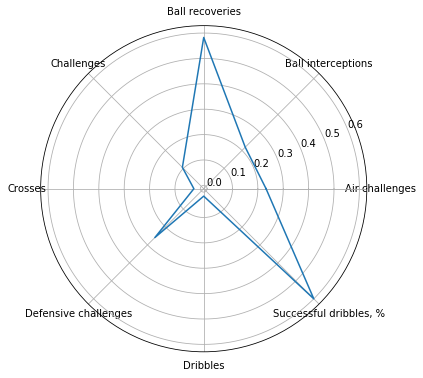

In [18]:
radar_chart_DEFENSA ('Irene Hernandez')

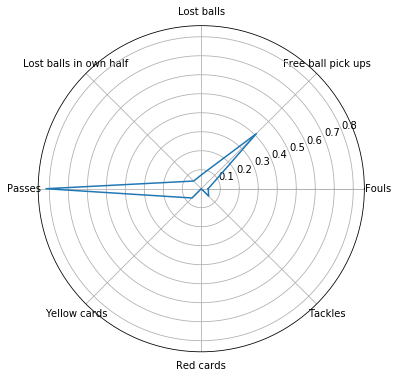

In [19]:
radar_chart_DEFENSA2 ('Irene Hernandez')

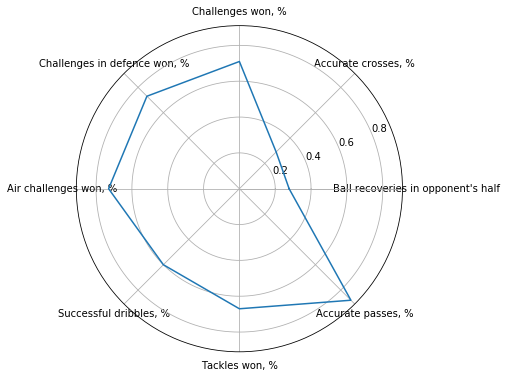

In [20]:
radar_chart_DEFENSA3 ('Irene Hernandez')

# Medio centro defensivo

In [21]:
def radar_chart_MED_DEF (name_player):
    

    features = ['Ball interceptions',"Ball recoveries",'Challenges','Crosses',"Defensive challenges",'Fouls',
                'Lost balls','Lost balls in own half']
    features_data = [df_normalizado_radar.loc [name_player,'Ball interceptions'],
                     df_normalizado_radar.loc [name_player,"Ball recoveries"],
                     df_normalizado_radar.loc [name_player,'Challenges'],
                     df_normalizado_radar.loc [name_player,"Crosses"], 
                     df_normalizado_radar.loc [name_player,"Defensive challenges"],
                     df_normalizado_radar.loc [name_player,'Fouls'], 
                     df_normalizado_radar.loc [name_player,'Lost balls'],
                     df_normalizado_radar.loc [name_player,'Lost balls in own half']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [22]:
def radar_chart_MED_DEF2 (name_player):
    

    features = ['Passes','Tackles','Red cards', 'Yellow cards', "Ball recoveries in opponent's half",'Fouls suffered',
                'Assists','Dribbles']
    
    features_data = [df_normalizado_radar.loc [name_player,'Passes'],
                     df_normalizado_radar.loc [name_player,"Tackles"],
                     df_normalizado_radar.loc [name_player,'Red cards'],
                     df_normalizado_radar.loc [name_player,"Yellow cards"], 
                     df_normalizado_radar.loc [name_player,"Ball recoveries in opponent's half"],
                     df_normalizado_radar.loc [name_player,'Fouls suffered'], 
                     df_normalizado_radar.loc [name_player,'Assists'],
                     df_normalizado_radar.loc [name_player,'Dribbles']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)                 
                     

In [23]:
def radar_chart_MED_DEF3 (name_player):
    

    features = ['Challenges in defence won, %','Accurate crosses, %','Challenges in attack won, %','Successful dribbles, %',
                'Air challenges','Air challenges won, %','Free ball pick ups','Challenges won, %']
    
    features_data = [df_normalizado_radar.loc [name_player,'Challenges in defence won, %'],
                     df_normalizado_radar.loc [name_player,"Accurate crosses, %"],
                     df_normalizado_radar.loc [name_player,'Challenges in attack won, %'],
                     df_normalizado_radar.loc [name_player,"Successful dribbles, %"], 
                     df_normalizado_radar.loc [name_player,"Air challenges"],
                     df_normalizado_radar.loc [name_player,'Air challenges won, %'], 
                     df_normalizado_radar.loc [name_player,'Free ball pick ups'],
                     df_normalizado_radar.loc [name_player,'Challenges won, %']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

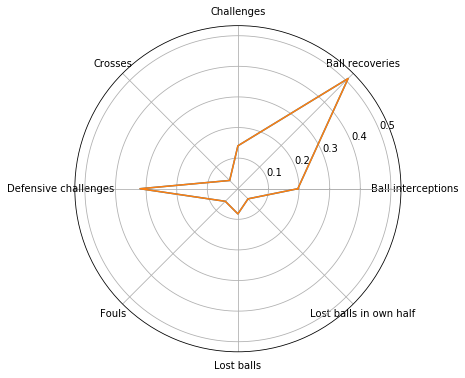

In [24]:
radar_chart_MED_DEF ('Formiga')

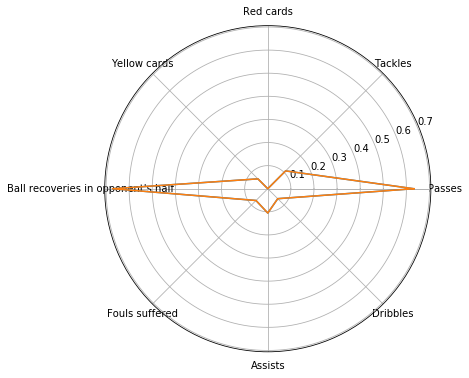

In [25]:
radar_chart_MED_DEF2 ('Formiga')

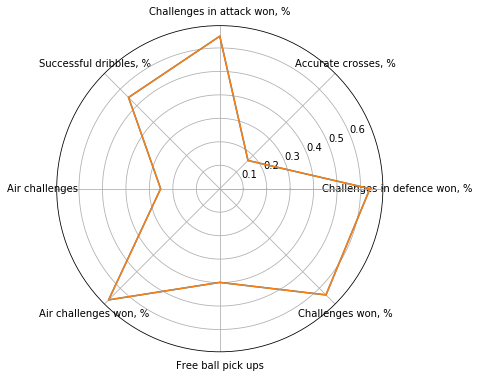

In [26]:
radar_chart_MED_DEF3 ('Formiga')

# Centrocampista ofensivo 

In [27]:
def radar_chart_MED_OF (name_player):
    

    features = ['Challenges','Lost balls','Fouls','Key passes','Ball interceptions',"Ball recoveries in opponent's half",
                'Attacking challenges','Assists']
    
    features_data = [df_normalizado_radar.loc [name_player,'Challenges'],
                     df_normalizado_radar.loc [name_player,"Lost balls"],
                     df_normalizado_radar.loc [name_player,'Fouls'],
                     df_normalizado_radar.loc [name_player,"Key passes"], 
                     df_normalizado_radar.loc [name_player,"Ball interceptions"],
                     df_normalizado_radar.loc [name_player,"Ball recoveries in opponent's half"], 
                     df_normalizado_radar.loc [name_player,'Attacking challenges'],
                     df_normalizado_radar.loc [name_player,'Assists']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [28]:
def radar_chart_MED_OF2 (name_player):
    

    features = ['Fouls suffered','Dribbles','Chances successful', 'Chances','Successful dribbles, %',
                'Challenges in attack won, %','Chances, % of conversion','Сhances created']
    
    features_data = [df_normalizado_radar.loc [name_player,'Fouls suffered'],
                     df_normalizado_radar.loc [name_player,"Dribbles"],
                     df_normalizado_radar.loc [name_player,'Chances successful'],
                     df_normalizado_radar.loc [name_player,"Chances"], 
                     df_normalizado_radar.loc [name_player,"Successful dribbles, %"],
                     df_normalizado_radar.loc [name_player,"Challenges in attack won, %"], 
                     df_normalizado_radar.loc [name_player,'Chances, % of conversion'],
                     df_normalizado_radar.loc [name_player,'Сhances created']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [29]:
def radar_chart_MED_OF3 (name_player):
    

    features = ['Shots on target','Shots','Passes','Challenges won, %','Air challenges won, %','Assists',
                'Offsides','Free ball pick ups']
    
    features_data = [df_normalizado_radar.loc [name_player,'Shots on target'],
                     df_normalizado_radar.loc [name_player,"Shots"],
                     df_normalizado_radar.loc [name_player,'Passes'],
                     df_normalizado_radar.loc [name_player,"Challenges won, %"], 
                     df_normalizado_radar.loc [name_player,"Air challenges won, %"],
                     df_normalizado_radar.loc [name_player,"Assists"], 
                     df_normalizado_radar.loc [name_player,'Offsides'],
                     df_normalizado_radar.loc [name_player,'Free ball pick ups']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

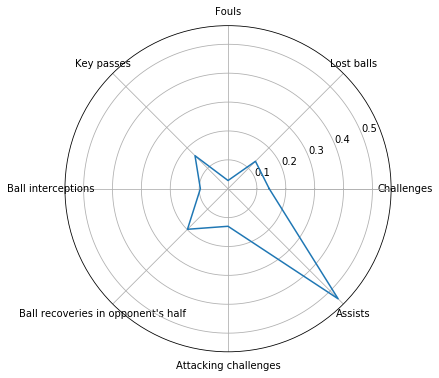

In [30]:
radar_chart_MED_OF ('Sandy Baltimore')

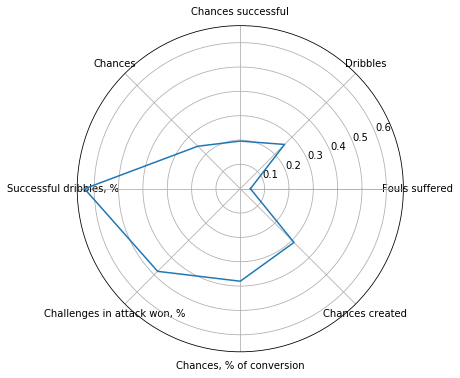

In [31]:
radar_chart_MED_OF2 ('Sandy Baltimore')

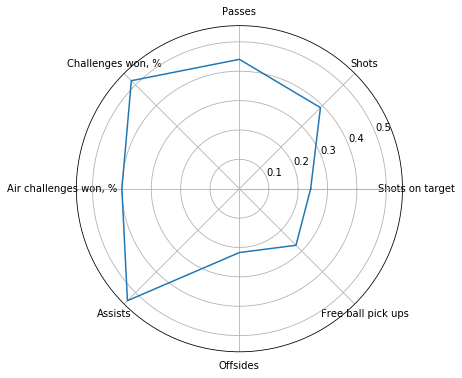

In [32]:
radar_chart_MED_OF3 ('Sandy Baltimore')

# Delanteras 

In [33]:
def radar_chart_DELANTERA (name_player):
    

    features = ['Air challenges','Assists','Attacking challenges','Challenges','Chances','Chances successful','Dribbles',
                'Fouls suffered']
    
    features_data = [df_normalizado_radar.loc [name_player,'Air challenges'],
                     df_normalizado_radar.loc [name_player,"Assists"],
                     df_normalizado_radar.loc [name_player,'Attacking challenges'],
                     df_normalizado_radar.loc [name_player,"Challenges"], 
                     df_normalizado_radar.loc [name_player,"Chances"],
                     df_normalizado_radar.loc [name_player,"Chances successful"], 
                     df_normalizado_radar.loc [name_player,'Dribbles'],
                     df_normalizado_radar.loc [name_player,'Fouls suffered']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [34]:
def radar_chart_DELANTERA2 (name_player):
    

    features = ['Free ball pick ups','Goals','Key passes','Lost balls','Offsides','Passes','Shots','Shots on target']
    
    features_data = [df_normalizado_radar.loc [name_player,'Free ball pick ups'],
                     df_normalizado_radar.loc [name_player,"Goals"],
                     df_normalizado_radar.loc [name_player,'Key passes'],
                     df_normalizado_radar.loc [name_player,"Lost balls"], 
                     df_normalizado_radar.loc [name_player,"Offsides"],
                     df_normalizado_radar.loc [name_player,"Passes"], 
                     df_normalizado_radar.loc [name_player,'Shots'],
                     df_normalizado_radar.loc [name_player,'Shots on target']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

In [35]:
def radar_chart_DELANTERA3 (name_player):
    

    features = ['Assists','Сhances created','Chances, % of conversion','Challenges won, %',
                'Challenges in attack won, %','Air challenges won, %','Successful dribbles, %','Accurate passes, %']
    
    features_data = [df_normalizado_radar.loc [name_player,'Assists'],
                     df_normalizado_radar.loc [name_player,"Сhances created"],
                     df_normalizado_radar.loc [name_player,'Chances, % of conversion'],
                     df_normalizado_radar.loc [name_player,"Challenges won, %"], 
                     df_normalizado_radar.loc [name_player,"Challenges in attack won, %"],
                     df_normalizado_radar.loc [name_player,"Air challenges won, %"], 
                     df_normalizado_radar.loc [name_player,'Successful dribbles, %'],
                     df_normalizado_radar.loc [name_player,'Accurate passes, %']]
                     
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

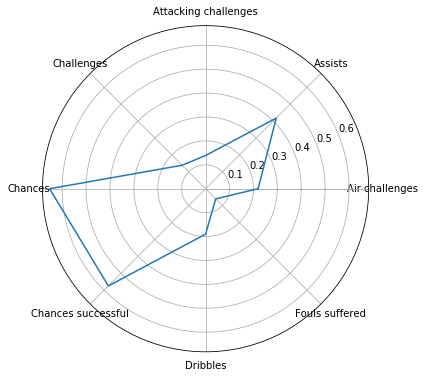

In [36]:
radar_chart_DELANTERA ('M. Katoto')

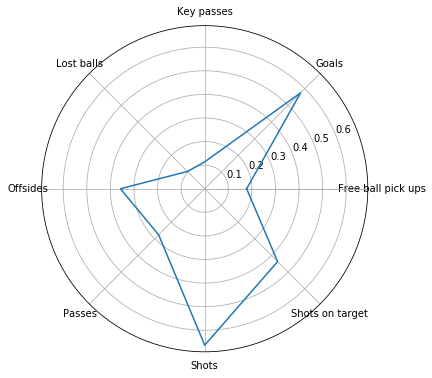

In [37]:
radar_chart_DELANTERA2 ('M. Katoto')

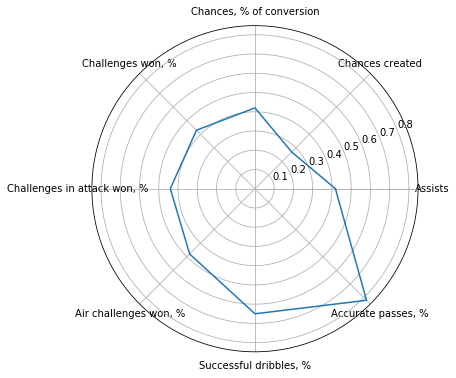

In [38]:
radar_chart_DELANTERA3 ('M. Katoto')